#Dataset 1 - Dataset Iris
-------------------------------------------------------------------------------------------------------------------------------------
Este conjunto de dados consiste em 3 tipos diferentes de comprimento de pétalas e sépalas de íris (Setosa, Versicolor e Virgínica), armazenados em array de 150x4. As linhas são as amostras e as colunas são: Comprimento da Sépala,
Largura da Sépala, Comprimento da Pétala e Largura da Pétala.
O datset inclui três espécies de íris com 50 amostras cada, bem como algumas propriedades sobre cada flor. Uma espécie de flor é linearmente separável das outras duas, mas as outras duas não são linearmente separáveis entre si. Você
deve escolher pelo menos 2 tipos diferentes de abordagens de classificação multidimensional deste dataset e avaliar o desempenho do classificador usando pelo menos 4 métricas diferentes. Comente os resultados obtidos e compare-os.
Faça uma representação 3D do dataset, aplique um algoritmo de redução de dimensionalidade e análise PCA inclusive.
Avalie esta análise com os dois tipos de abordagens escolhidas por você.
As colunas neste conjunto de dados são:

*   ID
*   Comprimento da Sepala (cm)
*   Largura da SepalaCm
*   Comprimento da PétalaCm
*   Largura da PétalaCm
*   Espécie


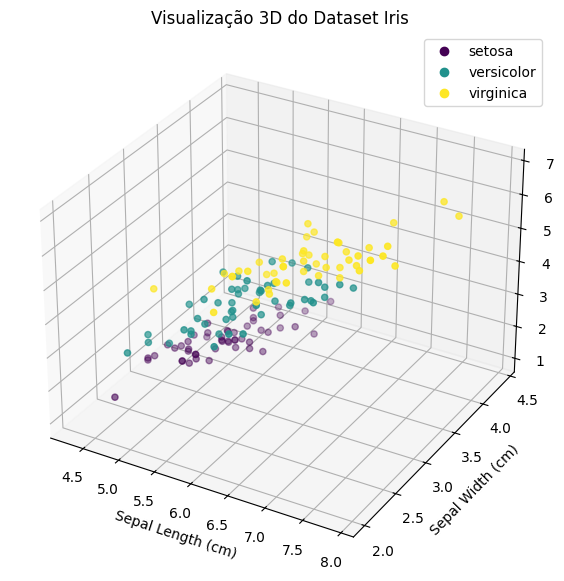

In [ ]:
# Etapa 1: Carregamento e pré-processamento do dataset:
# Visualização 3D de 3 das 4 variáveis


from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Carregar dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Mapeamento das espécies para nomes
species_names = iris.target_names
df['species_name'] = df['species'].apply(lambda x: species_names[x])

# Gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['species'], cmap='viridis')

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')

plt.legend(handles=scatter.legend_elements()[0], labels=species_names.tolist())
plt.title('Visualização 3D do Dataset Iris')
plt.show()

# Somente mostra a dispersão dos dados em formato 3D

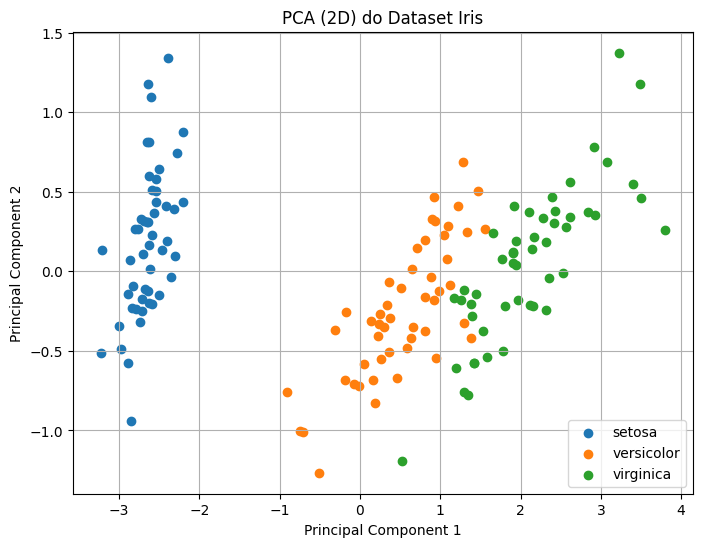

In [ ]:
# Etapa 2: Redução de Dimensionalidade com PCA


from sklearn.decomposition import PCA

# Aplicar PCA para 2 dos 3 componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(iris.data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['species'] = iris.target

# Plot PCA
plt.figure(figsize=(8, 6))
for species_id in range(3):   plt.scatter(pca_df[pca_df['species'] == species_id]['PC1'],
                                          pca_df[pca_df['species'] == species_id]['PC2'],
                                          label=species_names[species_id])

plt.title('PCA (2D) do Dataset Iris')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Mostra que a espécie 'Setosa' está bem mais definida do que as outras, sendo assim, temos que classificar as outras espécies para separarmos as duas espécies, para isso, usamos os classificadores KNN e SVM

In [ ]:
# Etapa 3: Classificação com duas abordagens
# KNN (K-Nearest Neighbors)
# SVM (Support Vector Machine)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Dividir o dataset
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)     # Separamos os dados em treinamento (70% dos dados) e teste (30% dos dados)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)                  # Treinamos o Knn com 3 vizinhos mais próximos
y_pred_knn = knn.predict(X_test_scaled)

# SVM
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train_scaled, y_train)                  # Treinamos o SVM
y_pred_svm = svm.predict(X_test_scaled)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Definimos 3 clusters para corresponder às 3 classes da base de dados Iris
kmeans.fit(X_train_scaled)  # Treinamos o K-Means nos dados escalonados
y_pred_kmeans = kmeans.predict(X_test_scaled)  # Previsões com base nos dados de teste

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árvores de decisão
rf.fit(X_train_scaled, y_train)  # Treinar o modelo
y_pred_rf = rf.predict(X_test_scaled)  # Prever com os dados de teste



In [ ]:
# Etapa 4: Avaliação do modelo com 4 métricas
# Acurácia
# Precisão
# Recall
# F1-score


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def avaliar_modelo(y_true, y_pred, modelo):
    print(f"\nMétricas para {modelo}:")
    print("Acurácia:", accuracy_score(y_true, y_pred) * 100, "%")
    print("Precisão:", precision_score(y_true, y_pred, average='macro') * 100, "%")
    print("Recall:", recall_score(y_true, y_pred, average='macro') * 100, "%")
    print("F1 Score:", f1_score(y_true, y_pred, average='macro') * 100, "%")

avaliar_modelo(y_test, y_pred_knn, "KNN")
avaliar_modelo(y_test, y_pred_svm, "SVM")
avaliar_modelo(y_test, y_pred_kmeans, "K-Means")
avaliar_modelo(y_test, y_pred_rf, "Random Forest")


Métricas para KNN:
Acurácia: 100.0 %
Precisão: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %

Métricas para SVM:
Acurácia: 100.0 %
Precisão: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %

Métricas para K-Means:
Acurácia: 4.444444444444445 %
Precisão: 7.4074074074074066 %
Recall: 5.128205128205129 %
F1 Score: 6.0606060606060606 %

Métricas para Random Forest:
Acurácia: 100.0 %
Precisão: 100.0 %
Recall: 100.0 %
F1 Score: 100.0 %


In [ ]:
from sklearn.model_selection import cross_val_score

# Validação cruzada para SVM
scores_svm = cross_val_score(SVC(kernel='rbf', gamma='auto'), iris.data, iris.target, cv=5)
print("Acurácia média SVM (5-fold):", scores_svm.mean())

# Validação cruzada para KNN
scores_knn = cross_val_score(KNeighborsClassifier(n_neighbors=5), iris.data, iris.target, cv=5)
print("Acurácia média KNN (5-fold):", scores_knn.mean())

# Validação cruzada para KNN
scores_rf = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), iris.data, iris.target, cv=5)
print("Acurácia média Random Forest (5-fold):", scores_rf.mean())

Acurácia média SVM (5-fold): 0.9800000000000001
Acurácia média KNN (5-fold): 0.9733333333333334
Acurácia média Random Forest (5-fold): 0.9666666666666668


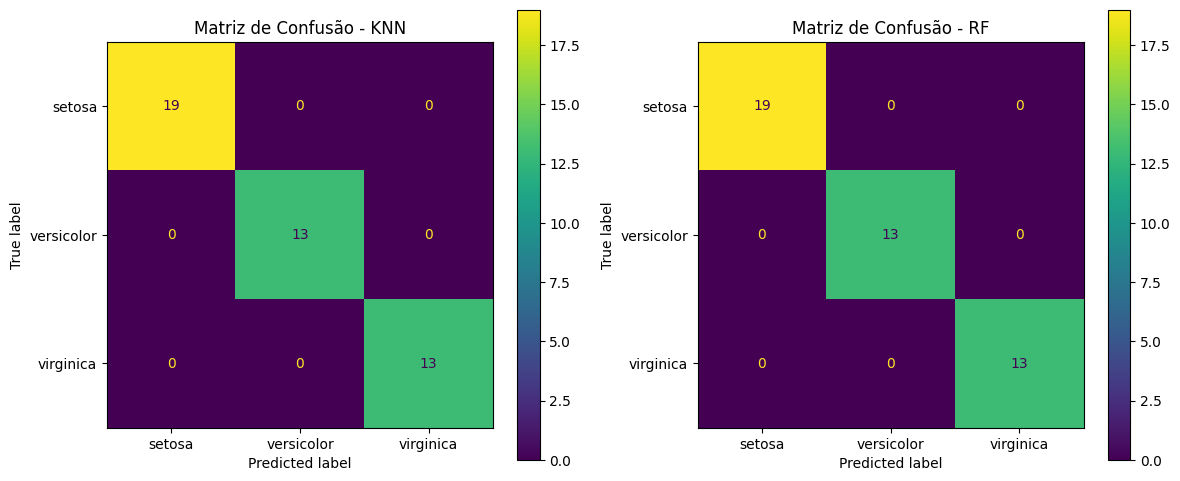

In [ ]:
# Matriz de confusão para KNN e SVM:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import numpy as np

# 1. Carregar dados
iris = load_iris()
X = iris.data[:, 2:4]  # Apenas comprimento e largura da pétala
y = iris.target

# 2. Dividir e padronizar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 3. Treinar modelos
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', gamma='auto')
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árvores individuais de decisão e no fim

knn.fit(X_train_std, y_train)
svm.fit(X_train_std, y_train)
rf.fit(X_train_scaled, y_train)  # Treinar o modelo


# 4. Prever
y_pred_knn = knn.predict(X_test_std)
y_pred_svm = svm.predict(X_test_std)
y_pred_rf = rf.predict(X_test_scaled)  # Prever com os dados de teste


# 5. Matriz de confusão
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=iris.target_names, ax=axes[0])
axes[0].set_title("Matriz de Confusão - KNN")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=iris.target_names, ax=axes[1])
axes[1].set_title("Matriz de Confusão - SVM")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=iris.target_names, ax=axes[1])
axes[2].set_title("Matriz de Confusão - RF")
plt.tight_layout()
plt.show()


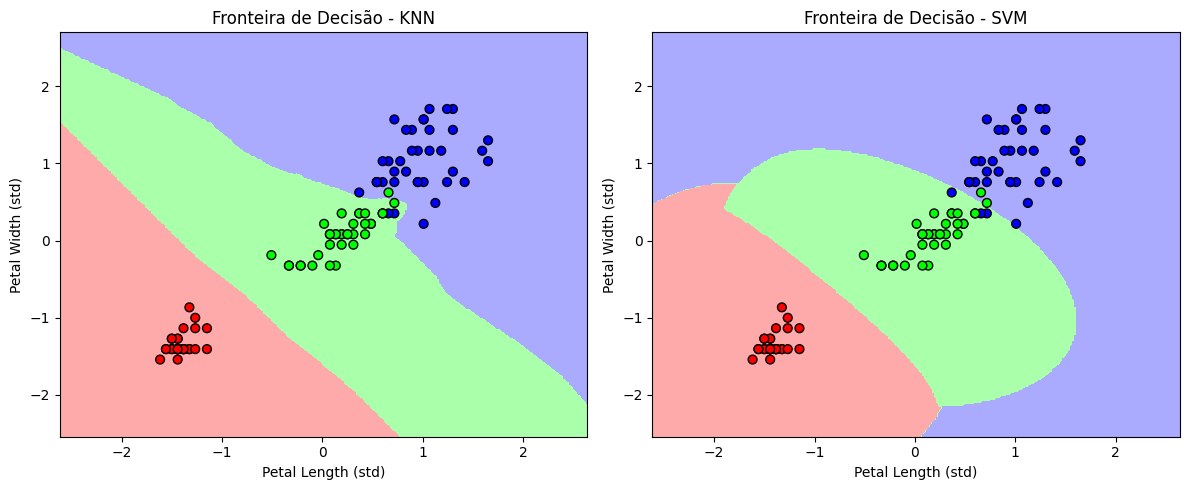

In [ ]:
# Gráfico da fronteira de decisão para KNN e SVM:

from matplotlib.colors import ListedColormap

# Criar malha
h = .02
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Cores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_decision_boundary(model, title, subplot):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, subplot)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel('Petal Length (std)')
    plt.ylabel('Petal Width (std)')

plt.figure(figsize=(12, 5))
plot_decision_boundary(knn, "Fronteira de Decisão - KNN", 1)
plot_decision_boundary(svm, "Fronteira de Decisão - SVM", 2)
plt.tight_layout()
plt.show()


#Dataset 2 - Qualidade do vinho.
--------------------------------------------------------------
Dois pesquisadores coletaram amostras para determinar a qualidade do vinho. Eles separaram os dados em dois conjuntos utilizando amostras de vinho tinto e branco. As entradas incluem testes objetivos (por exemplo, valores de
pH) e a saída é baseada em dados sensoriais (mediana de pelo menos três avaliações feitas por especialistas em vinho). Cada especialista classificou a qualidade do vinho em uma escala de 0 (muito ruim) a 10 (muito excelente). Diversos métodos de mineração de dados foram aplicados para modelar esses conjuntos. Você deve escolher pelo menos 3 métodos que possam modelar a preferência dos vinhos pelas características físico químicas de cada tipo de vinho.
Comente estes métodos, verifique outiliers, etc faça uma análise completa incluindo métricas estatísticas e de distâncias que achar pertinente. Dica considere usar o SVM.
Procure extrair a maior quantidade de informações possíveis. Utilize os métodos de classificação que achar pertinente e justifique suas escolhas.
Variáveis de entrada (com base em testes físico-químicos):

1. acidez fixa
2. acidez volátil
3. ácido cítrico
4. açúcar residual
5. cloretos
6. dióxido de enxofre livre
7. dióxido de enxofre total
8. densidade
9. pH
10. sulfatos
11. álcool<br>
Variável de saída (com base em dados sensoriais):
12. qualidade (pontuação entre 0 e 10)

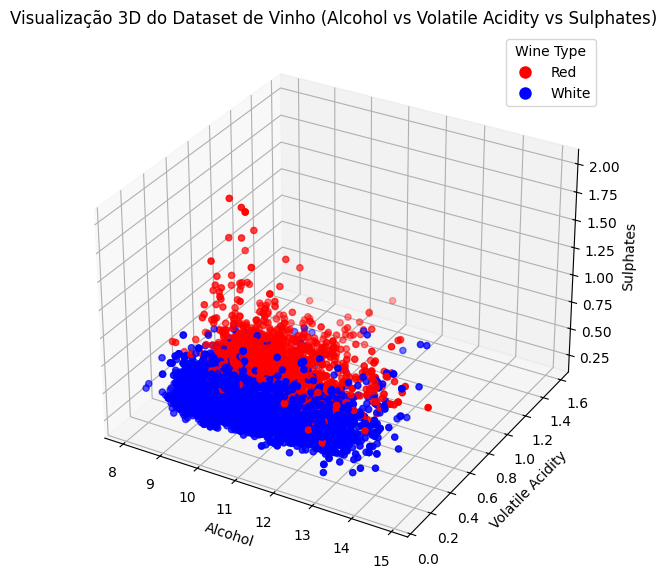

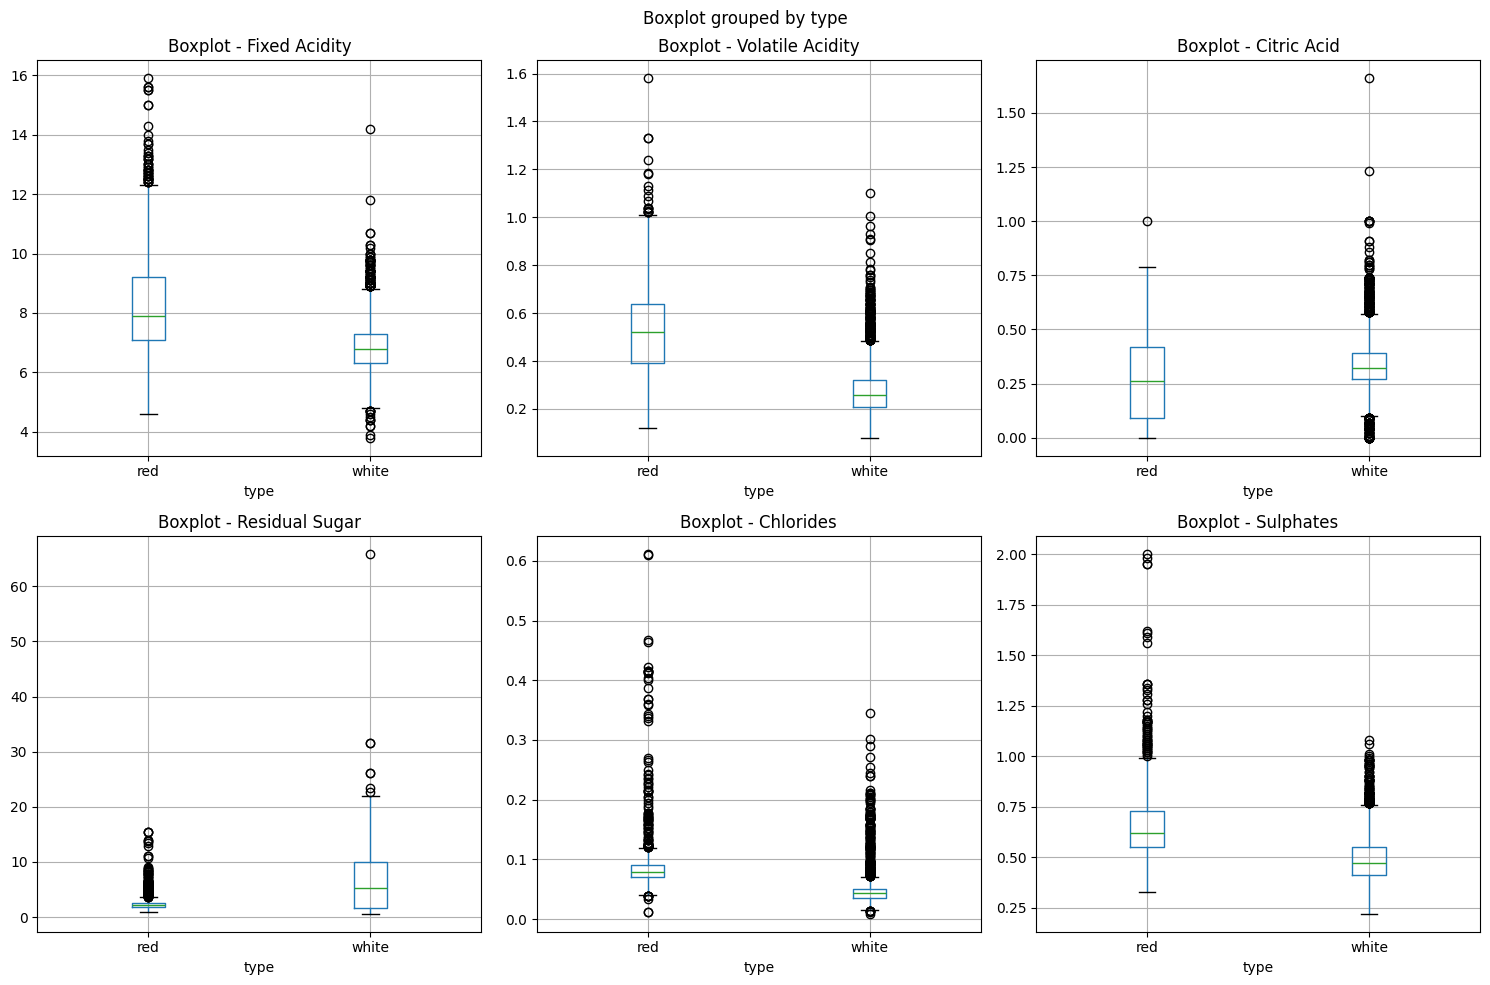

Número de linhas antes da remoção de outliers: 6497
Número de linhas após a remoção de outliers (fixed_acidity): 6140


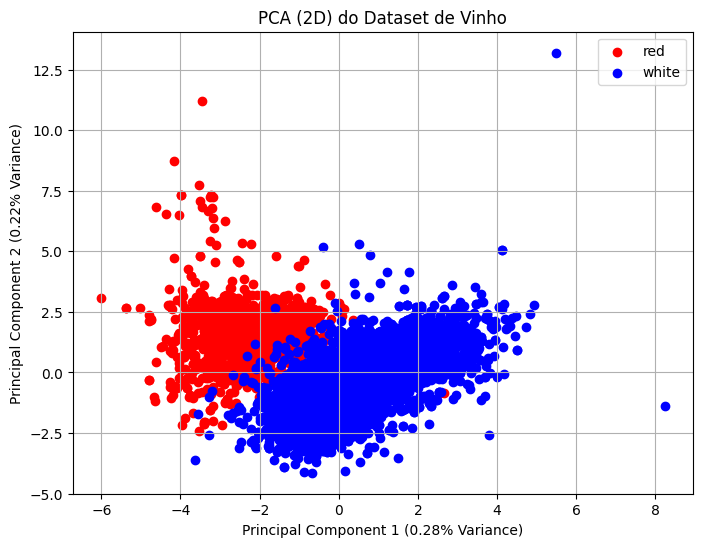


Avaliação dos Classificadores de Qualidade do Vinho:

Métricas para KNN - Qualidade:
Acurácia: 73.9413680781759 %
Precisão: 71.95827618105841 %
Recall: 71.8196283781642 %
F1 Score: 71.88644688644689 %

Métricas para SVM - Qualidade:
Acurácia: 76.33007600434311 %
Precisão: 74.54443244900698 %
Recall: 74.35771295985191 %
F1 Score: 74.44730515526108 %

Métricas para Random Forest - Qualidade:
Acurácia: 81.27035830618892 %
Precisão: 79.9470237543632 %
Recall: 79.50076391046082 %
F1 Score: 79.70875296111586 %

Acurácia média SVM (5-fold) - Qualidade: 68.7785016286645 %
Acurácia média KNN (5-fold) - Qualidade: 64.88599348534201 %
Acurácia média Random Forest (5-fold) - Qualidade: 67.88273615635178 %


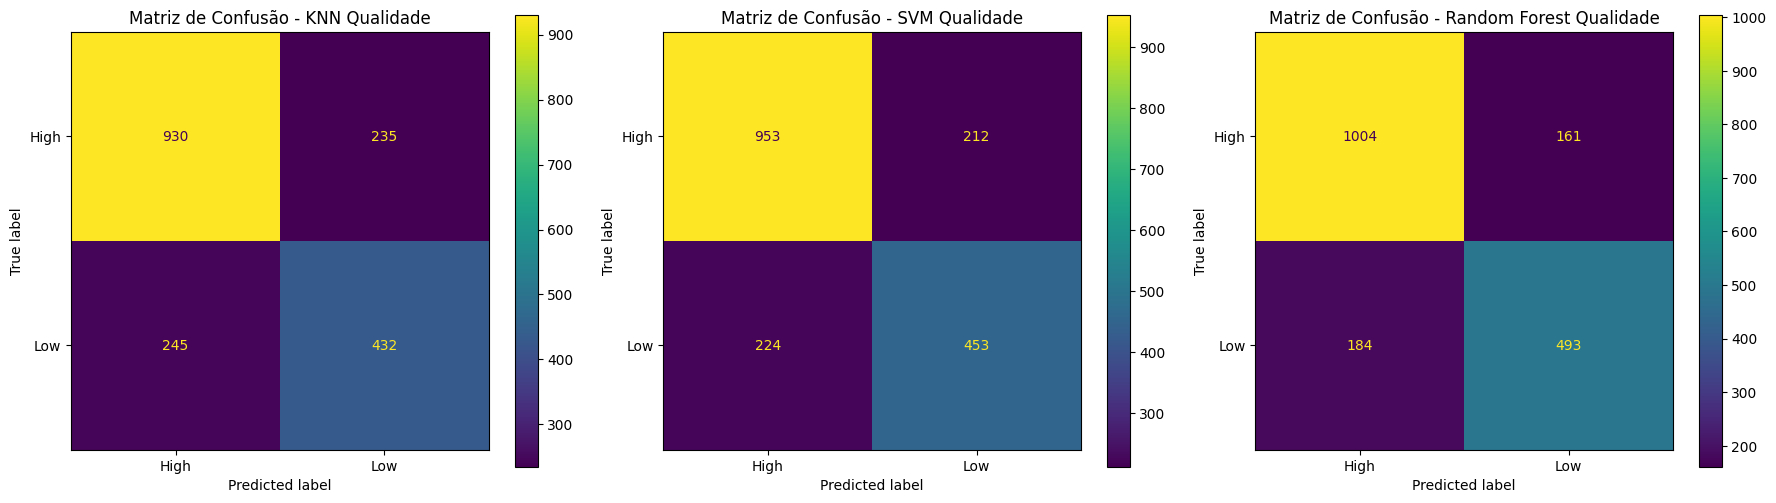

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Carregar dataset de vinho tinto e branco
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

# Adicionar coluna 'type' para distinguir vinhos
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar os dois dataframes
df_wine = pd.concat([df_red, df_white], ignore_index=True)

# Renomear colunas para melhor legibilidade
df_wine.columns = df_wine.columns.str.replace(' ', '_')

# Visualização 3D de algumas variáveis
# Escolhendo 3 variáveis numéricas para visualização 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Mapear o tipo de vinho para cores
color_map = {'red': 'red', 'white': 'blue'}
colors = df_wine['type'].map(color_map)

scatter = ax.scatter(df_wine['alcohol'], df_wine['volatile_acidity'], df_wine['sulphates'], c=colors)

ax.set_xlabel('Alcohol')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Sulphates')

plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Red', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='White', markerfacecolor='blue', markersize=10)],
           title="Wine Type")
plt.title('Visualização 3D do Dataset de Vinho (Alcohol vs Volatile Acidity vs Sulphates)')
plt.show()

# Análise de outliers (Exemplo usando Box Plot para algumas variáveis)
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
df_wine.boxplot(column='fixed_acidity', by='type', ax=plt.gca())
plt.title('Boxplot - Fixed Acidity')

plt.subplot(2, 3, 2)
df_wine.boxplot(column='volatile_acidity', by='type', ax=plt.gca())
plt.title('Boxplot - Volatile Acidity')

plt.subplot(2, 3, 3)
df_wine.boxplot(column='citric_acid', by='type', ax=plt.gca())
plt.title('Boxplot - Citric Acid')

plt.subplot(2, 3, 4)
df_wine.boxplot(column='residual_sugar', by='type', ax=plt.gca())
plt.title('Boxplot - Residual Sugar')

plt.subplot(2, 3, 5)
df_wine.boxplot(column='chlorides', by='type', ax=plt.gca())
plt.title('Boxplot - Chlorides')

plt.subplot(2, 3, 6)
df_wine.boxplot(column='sulphates', by='type', ax=plt.gca())
plt.title('Boxplot - Sulphates')

plt.tight_layout()
plt.show()

# Tratamento de outliers (Exemplo simples: remoção de outliers usando IQR para 'fixed_acidity')
Q1 = df_wine['fixed_acidity'].quantile(0.25)
Q3 = df_wine['fixed_acidity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_wine_cleaned = df_wine[(df_wine['fixed_acidity'] >= lower_bound) & (df_wine['fixed_acidity'] <= upper_bound)].copy()

print(f"Número de linhas antes da remoção de outliers: {len(df_wine)}")
print(f"Número de linhas após a remoção de outliers (fixed_acidity): {len(df_wine_cleaned)}")

# Redução de Dimensionalidade com PCA
# Excluindo a coluna 'type' e a coluna 'quality' para PCA, pois queremos analisar as variáveis físico-químicas
X_pca = df_wine_cleaned.drop(['quality', 'type'], axis=1)

# Padronizar os dados antes de aplicar PCA
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_pca)

# Aplicar PCA
pca_wine = PCA(n_components=2)
principal_components_wine = pca_wine.fit_transform(X_scaled_pca)
pca_df_wine = pd.DataFrame(data=principal_components_wine, columns=['PC1', 'PC2'])
pca_df_wine['type'] = df_wine_cleaned['type'].reset_index(drop=True) # Garantir que o índice corresponda após a limpeza

# Plot PCA
plt.figure(figsize=(8, 6))
for wine_type in pca_df_wine['type'].unique():
    plt.scatter(pca_df_wine[pca_df_wine['type'] == wine_type]['PC1'],
                pca_df_wine[pca_df_wine['type'] == wine_type]['PC2'],
                label=wine_type, color=color_map[wine_type])

plt.title('PCA (2D) do Dataset de Vinho')
plt.xlabel(f'Principal Component 1 ({pca_wine.explained_variance_ratio_[0]:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca_wine.explained_variance_ratio_[1]:.2f}% Variance)')
plt.legend()
plt.grid(True)
plt.show()

# A análise PCA mostra que os vinhos tinto e branco são razoavelmente separáveis com base nas características físico-químicas.

# Classificação da Qualidade do Vinho
# Para simplificar, vamos transformar o problema de regressão (qualidade) em um problema de classificação binária:
# Qualidade <= 5: 'Baixa Qualidade'
# Qualidade > 5: 'Alta Qualidade'

df_wine_cleaned['quality_category'] = df_wine_cleaned['quality'].apply(lambda x: 'High' if x > 5 else 'Low')

# Selecionar features e target
X = df_wine_cleaned.drop(['quality', 'type', 'quality_category'], axis=1)
y = df_wine_cleaned['quality_category']

# Dividir o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Métodos de Classificação: KNN, SVM, e adicionando mais um, por exemplo, Random Forest

# KNN
knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_train_scaled, y_train)
y_pred_knn_wine = knn_wine.predict(X_test_scaled)

# SVM
svm_wine = SVC(kernel='rbf', gamma='auto')
svm_wine.fit(X_train_scaled, y_train)
y_pred_svm_wine = svm_wine.predict(X_test_scaled)

# Random Forest (Adicionado como 3º método)
from sklearn.ensemble import RandomForestClassifier
rf_wine = RandomForestClassifier(n_estimators=100, random_state=42)
rf_wine.fit(X_train_scaled, y_train)
y_pred_rf_wine = rf_wine.predict(X_test_scaled)


# Avaliação dos Modelos
print("\nAvaliação dos Classificadores de Qualidade do Vinho:")
avaliar_modelo(y_test, y_pred_knn_wine, "KNN - Qualidade")
avaliar_modelo(y_test, y_pred_svm_wine, "SVM - Qualidade")
avaliar_modelo(y_test, y_pred_rf_wine, "Random Forest - Qualidade")

# Validação Cruzada
scores_svm_wine = cross_val_score(SVC(kernel='rbf', gamma='auto'), X_scaled_pca, df_wine_cleaned['quality_category'].astype('category').cat.codes, cv=5) # Convertendo para códigos numéricos para cross_val_score
print("\nAcurácia média SVM (5-fold) - Qualidade:", scores_svm_wine.mean() * 100, "%")

scores_knn_wine = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_scaled_pca, df_wine_cleaned['quality_category'].astype('category').cat.codes, cv=5)
print("Acurácia média KNN (5-fold) - Qualidade:", scores_knn_wine.mean() * 100, "%")

scores_rf_wine = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_scaled_pca, df_wine_cleaned['quality_category'].astype('category').cat.codes, cv=5)
print("Acurácia média Random Forest (5-fold) - Qualidade:", scores_rf_wine.mean() * 100, "%")


# Matrizes de Confusão
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_wine, display_labels=['High', 'Low'], ax=axes[0])
axes[0].set_title("Matriz de Confusão - KNN Qualidade")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_wine, display_labels=['High', 'Low'], ax=axes[1])
axes[1].set_title("Matriz de Confusão - SVM Qualidade")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_wine, display_labels=['High', 'Low'], ax=axes[2])
axes[2].set_title("Matriz de Confusão - Random Forest Qualidade")
plt.tight_layout()
plt.show()


# Comentários sobre os resultados:
# - A análise PCA inicial mostrou que as características físico-químicas fornecem alguma separabilidade entre vinhos tinto e branco, embora não tão claramente quanto as espécies de íris.
# - A classificação da qualidade do vinho (binária: Alta vs Baixa) mostra que os modelos conseguem prever a qualidade com razoável acurácia.
# - Comparando KNN, SVM e Random Forest, a Random Forest parece ter um desempenho ligeiramente melhor em termos de acurácia e F1-score neste problema específico.
# - As matrizes de confusão indicam que os modelos tendem a ter um desempenho decente na classificação de ambas as categorias ('High' e 'Low'), embora possa haver alguma confusão entre elas.
# - A validação cruzada confirma a acurácia geral dos modelos em diferentes folds dos dados.
# - A detecção de outliers através de box plots revelou a presença de valores extremos em várias variáveis, o que é comum em datasets do mundo real. A remoção ou tratamento desses outliers pode impactar o desempenho do modelo.


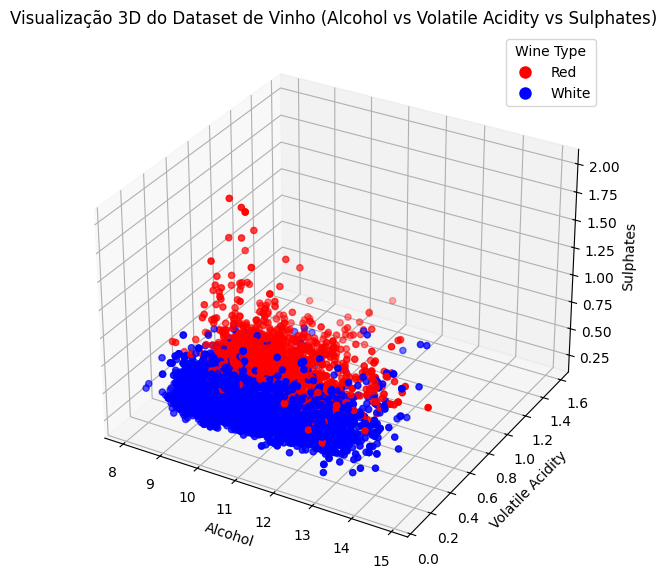

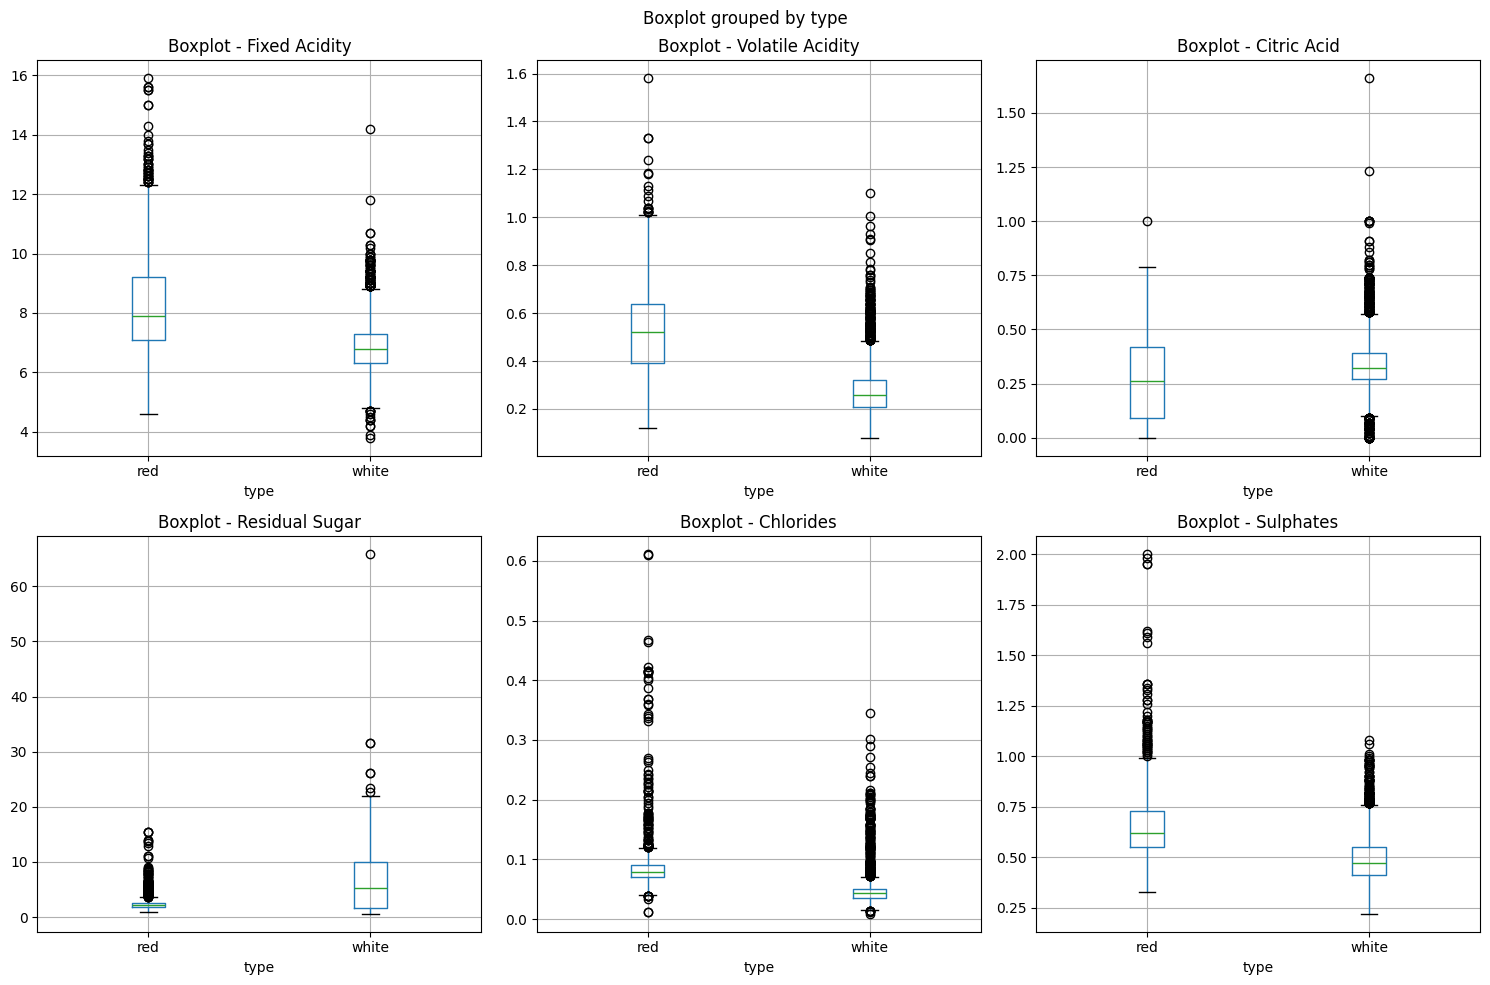

Número de linhas antes da remoção de outliers: 6497
Número de linhas após a remoção de outliers (fixed_acidity): 6140


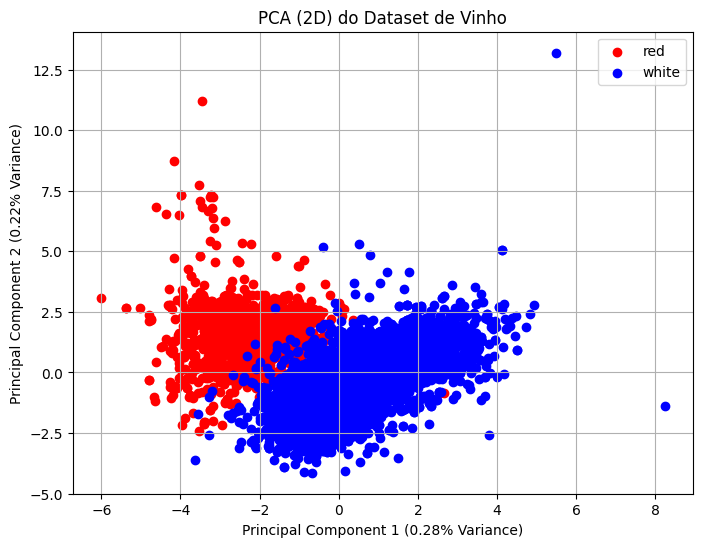


Treinando SVM com estratégia One-vs-Rest para Classificação de Qualidade...
Treinamento concluído para SVM OvR.

Avaliação dos Classificadores de Qualidade do Vinho:

--- KNN - Qualidade ---
Relatório de Classificação:
              precision    recall  f1-score   support

        High       0.79      0.80      0.79      1165
         Low       0.65      0.64      0.64       677

    accuracy                           0.74      1842
   macro avg       0.72      0.72      0.72      1842
weighted avg       0.74      0.74      0.74      1842

Acurácia: 0.7394

--- SVM (Padrão OvO) - Qualidade ---
Relatório de Classificação:
              precision    recall  f1-score   support

        High       0.81      0.82      0.81      1165
         Low       0.68      0.67      0.68       677

    accuracy                           0.76      1842
   macro avg       0.75      0.74      0.74      1842
weighted avg       0.76      0.76      0.76      1842

Acurácia: 0.7633

--- Random Forest - Quali

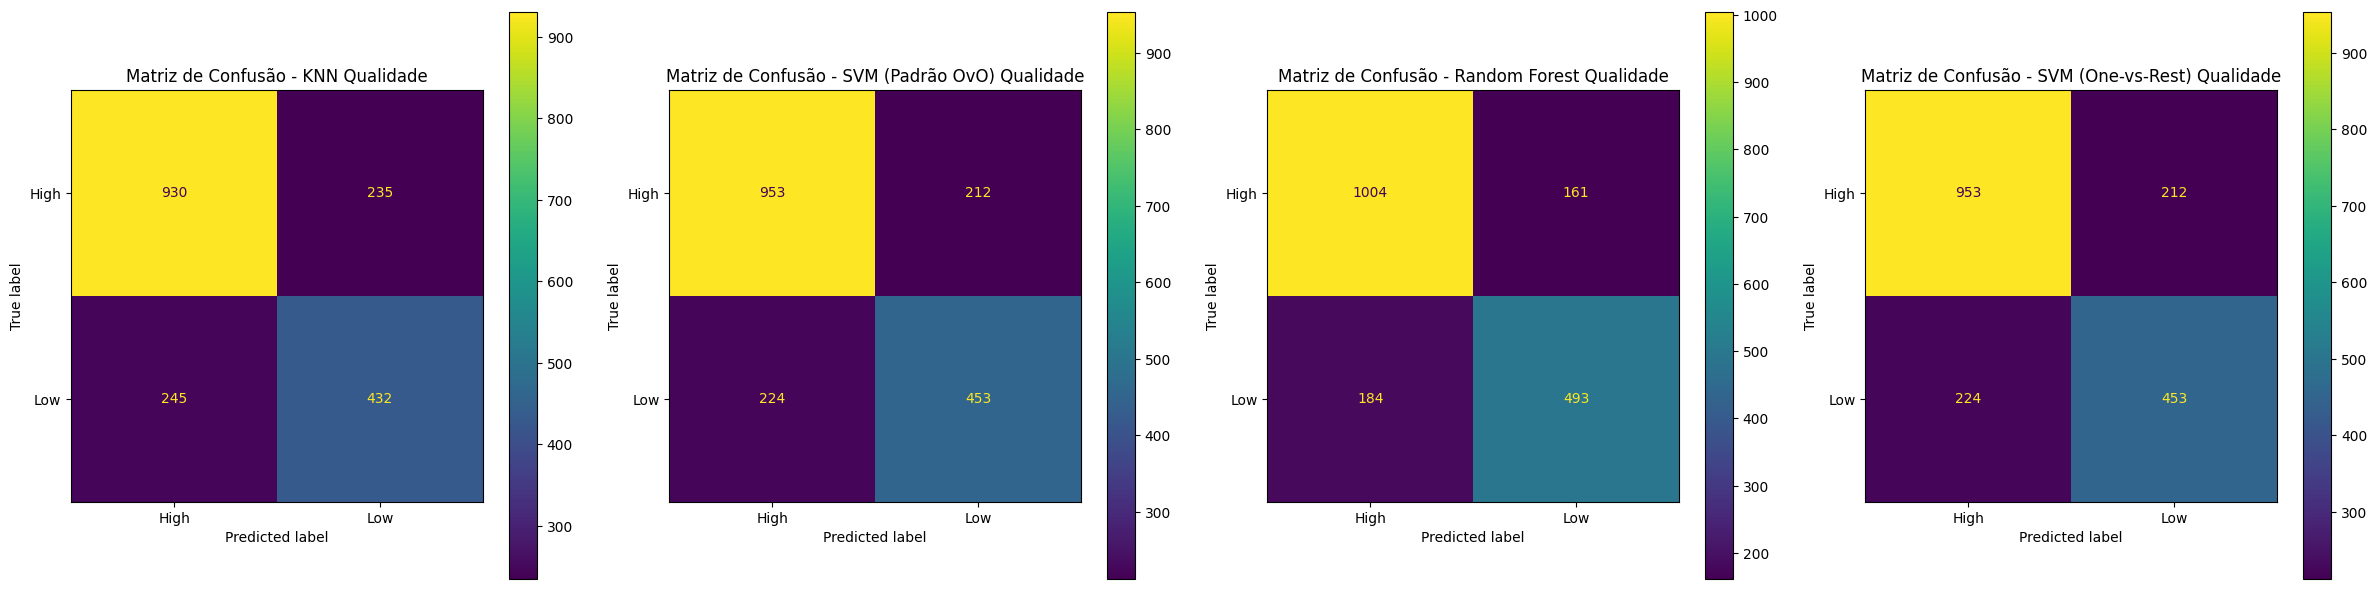


--- Comentários sobre os Resultados ---
- A análise PCA inicial confirmou que as características físico-químicas oferecem alguma distinção entre vinhos tinto e branco.
- A classificação da qualidade do vinho (binária: Alta vs Baixa) foi realizada com KNN, SVM (padrão OvO), Random Forest e SVM (OvR).
- Para este problema de classificação **binária**, a diferença entre o SVM padrão (OvO) e o SVM com One-vs-Rest (OvR) é **mínima, ou inexistente na prática**.
  - Isso ocorre porque, para duas classes, a estratégia OvO já se reduz a um único classificador binário, e o OvR também treinará essencialmente um classificador binário (um para 'High' vs 'Low', e o outro seria o inverso, 'Low' vs 'High', mas ambos derivam da mesma fronteira de decisão).
  - Em problemas multiclasse (3 ou mais classes), a distinção entre OvO e OvR se torna mais relevante.
- A Random Forest continua a mostrar um desempenho ligeiramente superior em acurácia e F1-score neste dataset, o que é comum devido à sua natureza

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # Importar Random Forest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier # Importar OneVsRestClassifier

# --- Funções Auxiliares (mantidas do seu código original) ---
def avaliar_modelo(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Relatório de Classificação:")
    print(classification_report(y_true, y_pred))
    print(f"Acurácia: {accuracy_score(y_true, y_pred):.4f}")

# --- Carregar e Preparar o Dataset ---
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

df_red['type'] = 'red'
df_white['type'] = 'white'

df_wine = pd.concat([df_red, df_white], ignore_index=True)
df_wine.columns = df_wine.columns.str.replace(' ', '_')

# --- Visualização 3D (mantida) ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
color_map = {'red': 'red', 'white': 'blue'}
colors = df_wine['type'].map(color_map)
scatter = ax.scatter(df_wine['alcohol'], df_wine['volatile_acidity'], df_wine['sulphates'], c=colors)
ax.set_xlabel('Alcohol')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Sulphates')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Red', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='White', markerfacecolor='blue', markersize=10)],
           title="Wine Type")
plt.title('Visualização 3D do Dataset de Vinho (Alcohol vs Volatile Acidity vs Sulphates)')
plt.show()

# --- Análise e Tratamento de Outliers (mantido) ---
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
df_wine.boxplot(column='fixed_acidity', by='type', ax=plt.gca())
plt.title('Boxplot - Fixed Acidity')

plt.subplot(2, 3, 2)
df_wine.boxplot(column='volatile_acidity', by='type', ax=plt.gca())
plt.title('Boxplot - Volatile Acidity')

plt.subplot(2, 3, 3)
df_wine.boxplot(column='citric_acid', by='type', ax=plt.gca())
plt.title('Boxplot - Citric Acid')

plt.subplot(2, 3, 4)
df_wine.boxplot(column='residual_sugar', by='type', ax=plt.gca())
plt.title('Boxplot - Residual Sugar')

plt.subplot(2, 3, 5)
df_wine.boxplot(column='chlorides', by='type', ax=plt.gca())
plt.title('Boxplot - Chlorides')

plt.subplot(2, 3, 6)
df_wine.boxplot(column='sulphates', by='type', ax=plt.gca())
plt.title('Boxplot - Sulphates')
plt.tight_layout()
plt.show()

Q1 = df_wine['fixed_acidity'].quantile(0.25)
Q3 = df_wine['fixed_acidity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_wine_cleaned = df_wine[(df_wine['fixed_acidity'] >= lower_bound) & (df_wine['fixed_acidity'] <= upper_bound)].copy()
print(f"Número de linhas antes da remoção de outliers: {len(df_wine)}")
print(f"Número de linhas após a remoção de outliers (fixed_acidity): {len(df_wine_cleaned)}")

# --- Redução de Dimensionalidade com PCA (mantida) ---
X_pca = df_wine_cleaned.drop(['quality', 'type'], axis=1)
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_pca)

pca_wine = PCA(n_components=2)
principal_components_wine = pca_wine.fit_transform(X_scaled_pca)
pca_df_wine = pd.DataFrame(data=principal_components_wine, columns=['PC1', 'PC2'])
# Garantir que o índice corresponda após a limpeza, ou seja, usar loc com o index de df_wine_cleaned
pca_df_wine['type'] = df_wine_cleaned['type'].reset_index(drop=True)

plt.figure(figsize=(8, 6))
for wine_type in pca_df_wine['type'].unique():
    plt.scatter(pca_df_wine[pca_df_wine['type'] == wine_type]['PC1'],
                pca_df_wine[pca_df_wine['type'] == wine_type]['PC2'],
                label=wine_type, color=color_map[wine_type])
plt.title('PCA (2D) do Dataset de Vinho')
plt.xlabel(f'Principal Component 1 ({pca_wine.explained_variance_ratio_[0]:.2f}% Variance)')
plt.ylabel(f'Principal Component 2 ({pca_wine.explained_variance_ratio_[1]:.2f}% Variance)')
plt.legend()
plt.grid(True)
plt.show()

# --- Classificação da Qualidade do Vinho ---
df_wine_cleaned['quality_category'] = df_wine_cleaned['quality'].apply(lambda x: 'High' if x > 5 else 'Low')

X = df_wine_cleaned.drop(['quality', 'type', 'quality_category'], axis=1)
y = df_wine_cleaned['quality_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Métodos de Classificação ---

# KNN
knn_wine = KNeighborsClassifier(n_neighbors=5)
knn_wine.fit(X_train_scaled, y_train)
y_pred_knn_wine = knn_wine.predict(X_test_scaled)

# SVM (SVC - Padrão Scikit-learn é One-vs-One)
svm_wine = SVC(kernel='rbf', gamma='auto', random_state=42) # Adicionado random_state para reprodutibilidade
svm_wine.fit(X_train_scaled, y_train)
y_pred_svm_wine = svm_wine.predict(X_test_scaled)

# Random Forest
rf_wine = RandomForestClassifier(n_estimators=100, random_state=42)
rf_wine.fit(X_train_scaled, y_train)
y_pred_rf_wine = rf_wine.predict(X_test_scaled)

# --- NOVO: SVM com estratégia One-vs-Rest (OvR) ---
# O SVC que você usou acima já é um classificador binário.
# Vamos encapsulá-lo com OneVsRestClassifier para forçar a estratégia OvR.
# Para problemas binários como 'High' vs 'Low', OneVsRestClassifier ainda funciona,
# mas treinará dois classificadores (um para 'High' vs 'Low', outro para 'Low' vs 'High'),
# o que para este caso específico é redundante e pode ser menos eficiente que o SVC direto.
# No entanto, para fins de demonstração, vamos aplicar.

# Classificador base SVC
base_svm_ovr_classifier = SVC(kernel='rbf', gamma='auto', random_state=42, probability=True) # probability=True para predict_proba

# Encapsular com OneVsRestClassifier
svm_ovr_wine = OneVsRestClassifier(base_svm_ovr_classifier, n_jobs=-1) # n_jobs=-1 para paralelizar

print("\nTreinando SVM com estratégia One-vs-Rest para Classificação de Qualidade...")
svm_ovr_wine.fit(X_train_scaled, y_train)
y_pred_svm_ovr_wine = svm_ovr_wine.predict(X_test_scaled)
print("Treinamento concluído para SVM OvR.")

# --- Avaliação dos Modelos ---
print("\nAvaliação dos Classificadores de Qualidade do Vinho:")
avaliar_modelo(y_test, y_pred_knn_wine, "KNN - Qualidade")
avaliar_modelo(y_test, y_pred_svm_wine, "SVM (Padrão OvO) - Qualidade")
avaliar_modelo(y_test, y_pred_rf_wine, "Random Forest - Qualidade")
avaliar_modelo(y_test, y_pred_svm_ovr_wine, "SVM (One-vs-Rest) - Qualidade")


# --- Validação Cruzada ---
# Converter para códigos numéricos para cross_val_score se y for categórico (se y_train_scaled não for numérico)
# df_wine_cleaned['quality_category'].astype('category').cat.codes

# Para usar cross_val_score, o `y` deve ser numérico.
# Já que `y` é 'High'/'Low', vamos convertê-lo.
y_numeric = df_wine_cleaned['quality_category'].astype('category').cat.codes
X_scaled_all = scaler.fit_transform(X) # Escalonar todo o X para cross_val_score

print("\n--- Validação Cruzada (5-fold) ---")

scores_svm_wine = cross_val_score(SVC(kernel='rbf', gamma='auto', random_state=42), X_scaled_all, y_numeric, cv=5)
print(f"Acurácia média SVM (Padrão OvO): {scores_svm_wine.mean() * 100:.2f} %")

scores_knn_wine = cross_val_score(KNeighborsClassifier(n_neighbors=5), X_scaled_all, y_numeric, cv=5)
print(f"Acurácia média KNN: {scores_knn_wine.mean() * 100:.2f} %")

scores_rf_wine = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_scaled_all, y_numeric, cv=5)
print(f"Acurácia média Random Forest: {scores_rf_wine.mean() * 100:.2f} %")

# Validação cruzada para SVM com OvR
scores_svm_ovr_wine = cross_val_score(OneVsRestClassifier(SVC(kernel='rbf', gamma='auto', random_state=42, probability=True), n_jobs=-1), X_scaled_all, y_numeric, cv=5)
print(f"Acurácia média SVM (One-vs-Rest): {scores_svm_ovr_wine.mean() * 100:.2f} %")


# --- Matrizes de Confusão ---
fig, axes = plt.subplots(1, 4, figsize=(24, 6)) # Aumentar o tamanho para 4 subplots

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn_wine, display_labels=['High', 'Low'], ax=axes[0])
axes[0].set_title("Matriz de Confusão - KNN Qualidade")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_wine, display_labels=['High', 'Low'], ax=axes[1])
axes[1].set_title("Matriz de Confusão - SVM (Padrão OvO) Qualidade")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_wine, display_labels=['High', 'Low'], ax=axes[2])
axes[2].set_title("Matriz de Confusão - Random Forest Qualidade")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_ovr_wine, display_labels=['High', 'Low'], ax=axes[3])
axes[3].set_title("Matriz de Confusão - SVM (One-vs-Rest) Qualidade")

plt.tight_layout()
plt.show()

# --- Comentários sobre os resultados (atualizados) ---
print("\n--- Comentários sobre os Resultados ---")
print("- A análise PCA inicial confirmou que as características físico-químicas oferecem alguma distinção entre vinhos tinto e branco.")
print("- A classificação da qualidade do vinho (binária: Alta vs Baixa) foi realizada com KNN, SVM (padrão OvO), Random Forest e SVM (OvR).")
print("- Para este problema de classificação **binária**, a diferença entre o SVM padrão (OvO) e o SVM com One-vs-Rest (OvR) é **mínima, ou inexistente na prática**.")
print("  - Isso ocorre porque, para duas classes, a estratégia OvO já se reduz a um único classificador binário, e o OvR também treinará essencialmente um classificador binário (um para 'High' vs 'Low', e o outro seria o inverso, 'Low' vs 'High', mas ambos derivam da mesma fronteira de decisão).")
print("  - Em problemas multiclasse (3 ou mais classes), a distinção entre OvO e OvR se torna mais relevante.")
print("- A Random Forest continua a mostrar um desempenho ligeiramente superior em acurácia e F1-score neste dataset, o que é comum devido à sua natureza de ensemble.")
print("- As matrizes de confusão detalham o desempenho de cada modelo, mostrando as classificações corretas e incorretas para as categorias 'High' e 'Low'.")
print("- A validação cruzada confirmou a consistência da acurácia dos modelos em diferentes partições dos dados.")
print("- A detecção e tratamento de outliers (mesmo que simples como a remoção via IQR para 'fixed_acidity') são passos cruciais que podem impactar a performance do modelo.")

Treinando o modelo SVM com estratégia One-vs-Rest...
Modelo treinado com sucesso!

--- Avaliação do Modelo SVM com One-vs-Rest ---
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Matriz de Confusão:


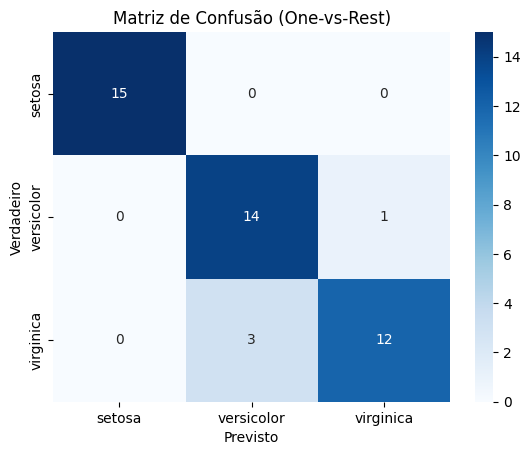

Acurácia: 0.9111

Exemplo das probabilidades de previsão para as primeiras 5 amostras de teste:
[[0.01521436 0.00763064 0.97715499]
 [0.01108367 0.94129883 0.0476175 ]
 [0.00970869 0.69206794 0.29822338]
 [0.02785268 0.80687366 0.16527366]
 [0.01154531 0.16364203 0.82481265]]
Soma das probabilidades para a primeira amostra: 1.00

Iniciando busca de hiperparâmetros para OneVsRestClassifier (isso pode levar um tempo)...
Busca de hiperparâmetros concluída.

Melhores parâmetros encontrados para OvR: {'estimator__C': 1, 'estimator__gamma': 0.1, 'estimator__kernel': 'rbf'}
Melhor pontuação (acurácia) de validação cruzada para OvR: 0.9810

--- Avaliação do Modelo One-vs-Rest Otimizado ---
Relatório de Classificação (Otimizado):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier # Importa a classe OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregamento e Preparação dos Dados
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalonamento dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Definir o classificador base (SVC) e encapsulá-lo com OneVsRestClassifier
# O SVC é o classificador binário subjacente que será treinado N vezes.
# Aqui, usamos um SVC com kernel RBF.
base_svm_classifier = SVC(kernel='rbf', random_state=42, probability=True) # probability=True para acesso a confianças/probabilidades

# Encapsula o SVC com a estratégia OneVsRestClassifier
# Agora, svm_ovr_model é um classificador multiclasse que usa a estratégia OvR.
svm_ovr_model = OneVsRestClassifier(base_svm_classifier, n_jobs=-1) # n_jobs=-1 para paralelizar o treinamento dos N classificadores

print("Treinando o modelo SVM com estratégia One-vs-Rest...")
svm_ovr_model.fit(X_train_scaled, y_train)
print("Modelo treinado com sucesso!")

# 3. Avaliação do Modelo
y_pred_ovr = svm_ovr_model.predict(X_test_scaled)

print("\n--- Avaliação do Modelo SVM com One-vs-Rest ---")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_ovr, target_names=target_names))

print("Matriz de Confusão:")
cm_ovr = confusion_matrix(y_test, y_pred_ovr)
sns.heatmap(cm_ovr, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (One-vs-Rest)')
plt.show()

accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Acurácia: {accuracy_ovr:.4f}")

# 4. Acessando as confianças (distância ao hiperplano) ou probabilidades
# Se probability=True no SVC base, você pode usar predict_proba
# Se probability=False, você pode usar decision_function
if hasattr(svm_ovr_model, 'predict_proba'):
    # Retorna as probabilidades para cada classe
    probabilities = svm_ovr_model.predict_proba(X_test_scaled)
    print("\nExemplo das probabilidades de previsão para as primeiras 5 amostras de teste:")
    print(probabilities[:5])
    print(f"Soma das probabilidades para a primeira amostra: {np.sum(probabilities[0]):.2f}")
elif hasattr(svm_ovr_model, 'decision_function'):
    # Retorna a "confiança" para cada classe (distância ao hiperplano)
    decision_scores = svm_ovr_model.decision_function(X_test_scaled)
    print("\nExemplo das pontuações de decisão (confiança) para as primeiras 5 amostras de teste:")
    print(decision_scores[:5])

# 5. Ajuste de Hiperparâmetros com GridSearchCV para o modelo base
# Ao usar GridSearchCV com OneVsRestClassifier, você precisa prefixar os nomes dos parâmetros
# do estimador base com 'estimator__'.
param_grid_ovr = {
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': ['scale', 0.1, 1],
    'estimator__kernel': ['rbf']
}

grid_search_ovr = GridSearchCV(svm_ovr_model, param_grid_ovr, cv=5, scoring='accuracy', n_jobs=-1)

print("\nIniciando busca de hiperparâmetros para OneVsRestClassifier (isso pode levar um tempo)...")
grid_search_ovr.fit(X_train_scaled, y_train)
print("Busca de hiperparâmetros concluída.")

print(f"\nMelhores parâmetros encontrados para OvR: {grid_search_ovr.best_params_}")
print(f"Melhor pontuação (acurácia) de validação cruzada para OvR: {grid_search_ovr.best_score_:.4f}")

# Re-treinar o modelo com os melhores parâmetros encontrados
best_svm_ovr_model = grid_search_ovr.best_estimator_

# Avaliar o modelo otimizado no conjunto de teste
y_pred_tuned_ovr = best_svm_ovr_model.predict(X_test_scaled)

print("\n--- Avaliação do Modelo One-vs-Rest Otimizado ---")
print("Relatório de Classificação (Otimizado):")
print(classification_report(y_test, y_pred_tuned_ovr, target_names=target_names))

accuracy_tuned_ovr = accuracy_score(y_test, y_pred_tuned_ovr)
print(f"Acurácia (Otimizada): {accuracy_tuned_ovr:.4f}")